In [20]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

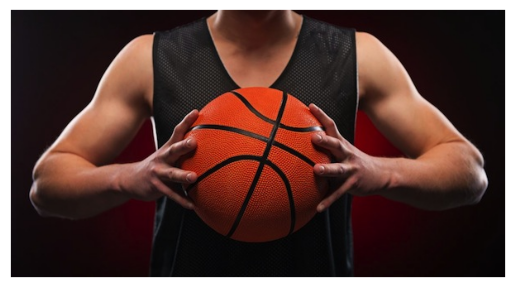

In [21]:
import imageio
basket = imageio.imread("basket.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(basket);

In [22]:
basket.shape

(325, 600, 3)

In [23]:
data = basket / 255.0
data = data.reshape(325 * 600, 3)
data.shape

(195000, 3)

In [24]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

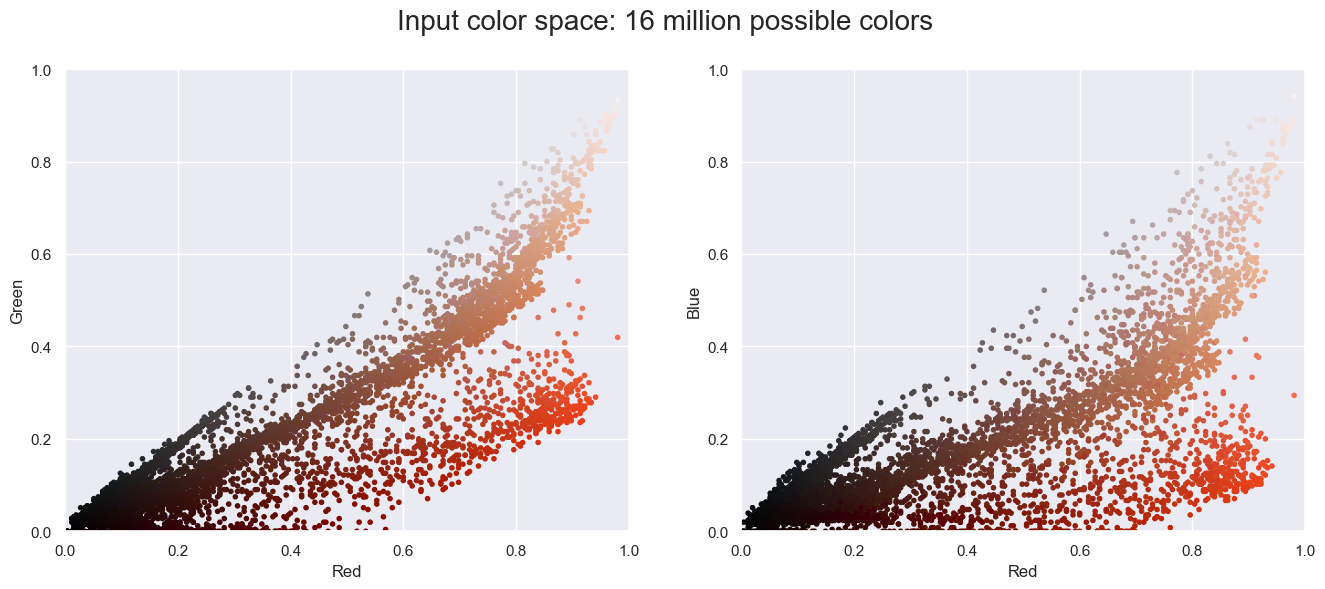

In [25]:
plot_pixels(data, title='Input color space: 16 million possible colors')

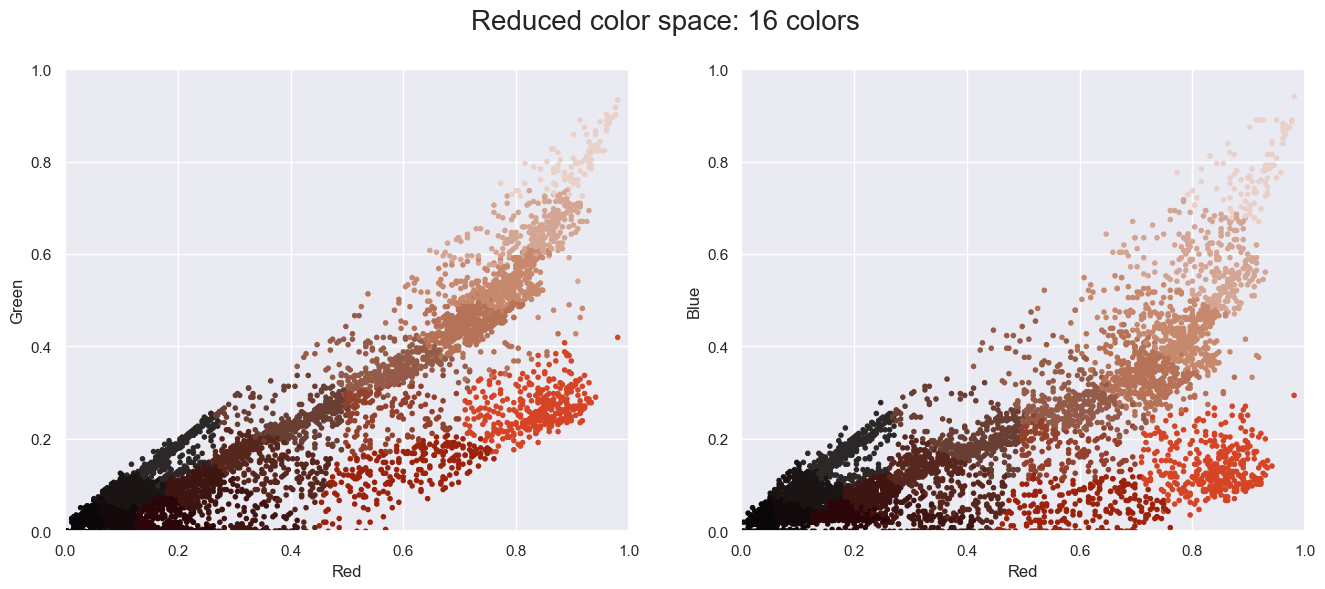

In [26]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

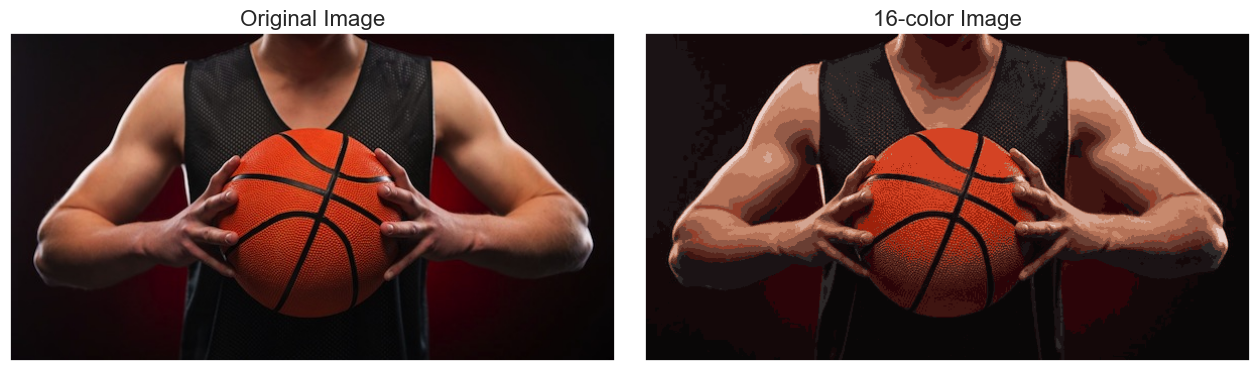

In [27]:
basket_recolored = new_colors.reshape(basket.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(basket)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(basket_recolored)
ax[1].set_title('16-color Image', size=16);

# **Elbow Method dan visualisasi line chartnya**

In [28]:
from sklearn.cluster import KMeans

In [29]:
def hitung_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) * 2 + (points[i, 1] -curr_center[1]) * 2
        sse.append(curr_sse)
    return sse

In [30]:
# Menentukan k_max
k_max = 8

In [31]:
# Menyimpan Nilai WSS dalam y

y = hitung_WSS(data,k_max)

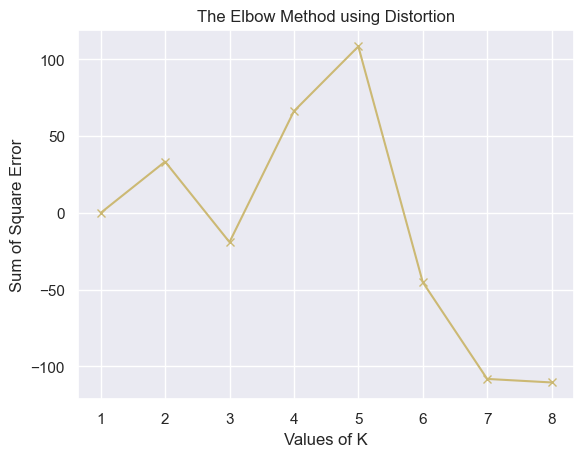

In [32]:
# Tampilkan dalam Diagram Elbow 

plt.plot(range(1, 9), y, 'yx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of Square Error')
plt.title('The Elbow Method using Distortion')
plt.show()

In [33]:
# Print WSS

y

[-1.1956313272776242e-08,
 33.42501397959681,
 -19.05247058004388,
 66.27731877201703,
 108.4514796388242,
 -45.13144243976637,
 -108.17924622810456,
 -110.47284041690348]

# **silhoutte dan line chartnya**

In [34]:
# Mengimport Library Silhouette Method

from sklearn.metrics import silhouette_score

In [35]:
# Menginisialsisasi array untuk menyimpan nilai Silhouette

silhouette = []

In [36]:
# Membuat perulangan untuk menghitung masing-masing nilai Silhouette

for k in range(2, k_max+1):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  silhouette.append(silhouette_score(data, labels, metric = 'euclidean'))

In [37]:
# Mengeprint array silhouette

silhouette

[0.7398725466005536,
 0.6806812473616717,
 0.5788558300819865,
 0.5830346128980719,
 0.5318554318236003,
 0.5080360912270939,
 0.5006336359195003]

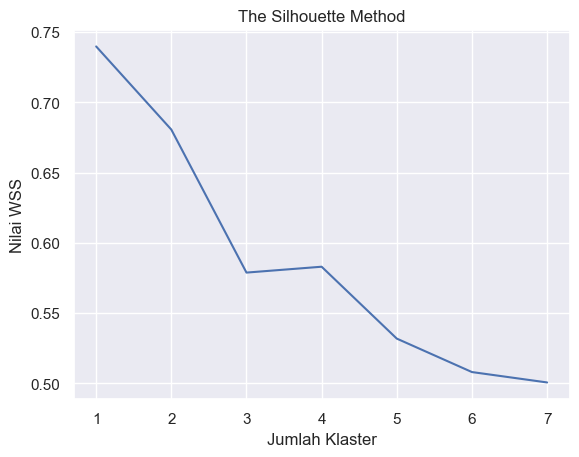

In [38]:
# Menampilkan diagram silhouette method

xsilhouette = [1,2,3,4,5,6,7,]

plt.plot(xsilhouette, silhouette) 
plt.title('The Silhouette Method')
plt.xlabel('Jumlah Klaster') 
plt.ylabel('Nilai WSS') 
plt.show()